In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
temp = []
data = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    data.append(response)
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.86, 51.51, 59.91, 39.91]
The temperature information received is: [6.64, 3.76, 2.75, 5.73]


In [7]:
df = pd.DataFrame(data)
df.head()

,base,clouds,cod,coord,dt,id,main,name,rain,sys,visibility,weather,wind
0,stations,{'all': 0},200,"{'lon': 2.35, 'lat': 48.86}",1551145224,2988507,"{'temp': 6.64, 'pressure': 1033, 'humidity': 6...",Paris,NaN,"{'type': 1, 'id': 6540, 'message': 0.0057, 'co...",10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.1, 'deg': 360}"
1,stations,{'all': 0},200,"{'lon': -0.13, 'lat': 51.51}",1551142517,2643743,"{'temp': 3.76, 'pressure': 1035, 'humidity': 8...",London,NaN,"{'type': 1, 'id': 1414, 'message': 0.0086, 'co...",8000.0,"[{'id': 721, 'main': 'Haze', 'description': 'h...",{'speed': 1.5}
2,stations,{'all': 12},200,"{'lon': 10.74, 'lat': 59.91}",1551145533,3143244,"{'temp': 2.75, 'pressure': 1030, 'humidity': 8...",Oslo,NaN,"{'type': 1, 'id': 1662, 'message': 0.0043, 'co...",NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 2.1, 'deg': 100}"
3,stations,{'all': 0},200,"{'lon': 116.39, 'lat': 39.91}",1551145681,1816670,"{'temp': 5.73, 'pressure': 1028, 'humidity': 3...",Beijing,{'1h': 0.51},"{'type': 1, 'id': 9609, 'message': 0.0041, 'co...",10000.0,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'speed': 1}


In [8]:
df["lat"] = df["coord"].map(lambda x: x["lat"])

In [9]:
df.head()

,base,clouds,cod,coord,dt,id,main,name,rain,sys,visibility,weather,wind,lat
0,stations,{'all': 0},200,"{'lon': 2.35, 'lat': 48.86}",1551145224,2988507,"{'temp': 6.64, 'pressure': 1033, 'humidity': 6...",Paris,NaN,"{'type': 1, 'id': 6540, 'message': 0.0057, 'co...",10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.1, 'deg': 360}",48.86
1,stations,{'all': 0},200,"{'lon': -0.13, 'lat': 51.51}",1551142517,2643743,"{'temp': 3.76, 'pressure': 1035, 'humidity': 8...",London,NaN,"{'type': 1, 'id': 1414, 'message': 0.0086, 'co...",8000.0,"[{'id': 721, 'main': 'Haze', 'description': 'h...",{'speed': 1.5},51.51
2,stations,{'all': 12},200,"{'lon': 10.74, 'lat': 59.91}",1551145533,3143244,"{'temp': 2.75, 'pressure': 1030, 'humidity': 8...",Oslo,NaN,"{'type': 1, 'id': 1662, 'message': 0.0043, 'co...",NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...","{'speed': 2.1, 'deg': 100}",59.91
3,stations,{'all': 0},200,"{'lon': 116.39, 'lat': 39.91}",1551145681,1816670,"{'temp': 5.73, 'pressure': 1028, 'humidity': 3...",Beijing,{'1h': 0.51},"{'type': 1, 'id': 9609, 'message': 0.0041, 'co...",10000.0,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'speed': 1},39.91


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp
0,Paris,48.86,6.64
1,London,51.51,3.76
2,Oslo,59.91,2.75
3,Beijing,39.91,3.17


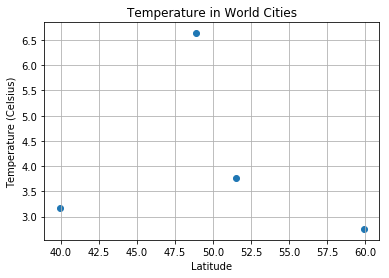

In [5]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()